In [1]:
# initializing otter-grader
import otter
grader = otter.Notebook()

# Lab 6: Principal Component Analysis

In this lab assignment, we will walk through two examples of Principal Component Analysis (PCA).

The first is on the classic handwriting digits dataset to show the immediate utility that PCA can provide.

In the second example, we will take a closer look at how PCA works via a diabetes dataset.

## Due Date

This assignment is due **Friday, May 8 at 11:59pm PST**.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** in the cell below.

**Collaborators:** ...

## Handwriting Digits

### The handwriting section of this notebook was taken from materials here from Jake VanderPlas: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
from sklearn.decomposition import PCA

Let's load the handwriting digits and look at the shape:

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Note that there are 1797 images and each one is 8x8, or 64 pixels

#### Let's take a look at the handwriting digits dataset:

Note that we're using matplotlib to display these images. Altair is not designed to handle displaying images, so if we were to plot these as Altair heatmaps, our code would look very ugly. This is one of several use cases where we would use matplotlib over Altair.

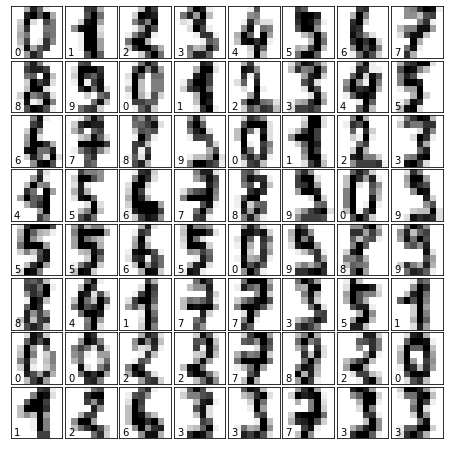

In [4]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

The digits themselves are 64-dimensional since they are 8x8. Let's use PCA to project the digits into two dimensions and look at the representation of the digits we get.

Note that the dimension changes so that we go from 64-dimensional to 2-dimensional.

In [5]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [6]:
digits_pca = pd.DataFrame({
    'component 1': projected[:,0],
    'component 2': projected[:,1],
    'digit': digits.target
})

alt.Chart(digits_pca).mark_circle().encode(
    x = 'component 1',
    y = 'component 2',
    color = alt.Color('digit:N', scale=alt.Scale(scheme='tableau10'))
)

alt.Chart(...)

Note that in two dimensions we can get an interesting visualization of the digits. Without doing any supervised learning - without clustering at all - we see the digits basically separate themselves into different regions.

This is one of the main advantages of PCA. Our data began as 64-dimensional, but by using simple techniques we were able to reduce it into the two dimensions that explain most of the variation in the data.

In fact, let's do PCA, return the first 20 components, and examine a cumulative variance plot.

In [7]:
pca = PCA(20).fit(digits.data)

pca_variance = pd.DataFrame({
    'x': list(range(1,21)),
    'y': np.cumsum(pca.explained_variance_ratio_)
})
alt.Chart(pca_variance).mark_line().encode(
    x = alt.X('x', title='Number of components'),
    y = alt.Y('y', title='Cumulative explained variance', scale=alt.Scale(domain=(0,1)))
)

alt.Chart(...)

In the cell above, we plot the cumulative variance of the number of components. You can see that with the first 20 components we can explain about 90% of the variance in the data. But the previous plot shows us that even with two components we can get a good representation of our digits.

PCA-type methods are also useful for storing images. Rather than storing the entire image, your phone/computer can store the PCA representation of it and preserve most of the quality.

## Now we'll take a closer look at PCA using a diabetes dataset.

In [8]:
fpath = 'diabetes.tsv'
diabetes_df = pd.read_csv(fpath, sep='\t')
diabetes_df = diabetes_df.rename(columns={
    'Y': 'target',
    'AGE': 'age',
    'SEX': 'sex',
    'BMI': 'bmi',
    'BP': 'bp',
    'S1': 's1',
    'S2': 's2',
    'S3': 's3',
    'S4': 's4',
    'S5': 's5',
    'S6': 's6'
})
diabetes_df.head()

age  sex   bmi     bp   s1     s2    s3   s4      s5  s6  target
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87     151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69      75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85     141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89     206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80     135

In [9]:
diabetes_features = diabetes_df.loc[:, diabetes_df.columns != 'target'].values

## Question 0a

Let's take a look at the description of the diabetes dataset at [this link](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset). Use functions you have learned in Lab 4 to look at an overview of the data and discuss what you see with your classmates. Write down what you think the goal of this dataset is.

*Hint: The dataset came with a column called "target". What could we be predicting?*

<!--
BEGIN QUESTION
name: q0a
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

In [10]:
### SCRATCH WORK

We are predicting the disease progression after one year. 

## Question 0b

From our exploration in 0a, we should see that the mean of our target variable is about 152. Let's make a new column called `target_above_mean` that has value `True` if the mean is above 152 and `False` if the mean is below it.

<!--
BEGIN QUESTION
name: q0b
points: 4
manual: false
-->

In [11]:
diabetes_df['target_above_mean'] = [True if x > 152 else False for x in diabetes_df['target']] 
diabetes_df.head()

age  sex   bmi     bp   s1     s2    s3   s4      s5  s6  target  \
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87     151   
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69      75   
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85     141   
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89     206   
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80     135   

   target_above_mean  
0              False  
1              False  
2              False  
3               True  
4              False

## Question 1

Let's explore the data by creating a scatter matrix of our diabetes features. To do this, we'll create 2D scatter plots for nine of our features, excluding sex. 

(This is similar to the matrix we created in HW3, Q5a)

Follow the example at https://altair-viz.github.io/gallery/scatter_matrix.html to create a pairplot where the plots displaying the same variable are on the TopLeft-BottomRight diagonal. Use the color scheme `'set1'`, and set the width and height of each plot to be `80`.

<!--
BEGIN QUESTION
name: q1
points: 7
manual: true
-->
<!-- EXPORT TO PDF -->

In [12]:
alt.Chart(diabetes_df).mark_circle().encode(
    x = alt.X(alt.repeat("column"), type='quantitative'),
    y = alt.Y(alt.repeat("row"), type='quantitative'),
    color= alt.Color('target_above_mean:N',
    scale = alt.Scale(scheme = 'set1'), legend=alt.Legend(title="Target Above Mean"))
).properties(
    width=80,
    height=80
).repeat(
    row = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
    column = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
).interactive()

alt.RepeatChart(...)

Are there any interesting relationships that you see? List at least two relationships you find notable.
<!--
BEGIN QUESTION
name: q1b
points: 5
manual: true
-->
<!-- EXPORT TO PDF -->

1. Look at axis first, see what they represent.  Knowing what var you're comparing against other vars
2. Look at shape of clouds of points, color
3. Look at the coloring and see how they are distributed. (for my notes, not part of answer)

I noticed that as BMI was graphed against the six different serum tests, it looks like people with lower BMI tend to be below the target mean for blood pressure. When considering the graph of age on bmi, below target mean patients tend to be younger and have a lower BMI.   Blood pressure and bmi seem to have similarly shaped spreads in both their colors and the shape of their scatter clouds.  

Age has a couple of interesting features.  As age is graphed against the 6 serum tests, it seems that the spread of both targets below the mean and above the mean start to have better scatter and intermingle with the other color.  I'm not entirely sure why this is the case, but I suspect that as time passes, people with diabetes will start having similar symptoms regardless of age.  

## Question 2a

To apply PCA, we will first need to "center" the data so that the mean of each feature is 0. Additionally, we will need to scale the centered data by $\frac{1}{\sqrt n}$, where $n$ is the number of samples (rows) we have in our dataset. 

**Do you know why it is important to center and scale the data before applying PCA? Ask a tutor or TA if you are unsure.**
<!--
BEGIN QUESTION
name: q2a
points: 3
manual: true
-->
<!-- EXPORT TO PDF -->

You want to scale the data because sometimes not all of the data will have the same units of measurement and that would affect your analysis. You want to center the data so that you can see how much the data varies from the center.  

## Question 2b

Compute the columnwise mean of `diabetes_features` in the cell below and store it in `diabetes_mean` (should be a numpy array of 10 means, 1 for each attribute). Then, subtract `diabetes_mean` from `diabetes_features`, divide the result by the $\sqrt n$, and save the result in `normalized_features`.

**Hints:** 
* Use `np.mean` or `np.average` to compute `diabetes_mean`, and pay attention to the `axis` argument.
* If you are confused about how numpy deals with arithmetic operations between arrays of different shapes, see this note about [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) for explanations/examples.

<!--
BEGIN QUESTION
name: q2b
points: 2
manual: false
-->

In [13]:
n = diabetes_features.shape[0] # should be 442
diabetes_mean = np.average(diabetes_features, axis = 0)
normalized_features = (diabetes_features - diabetes_mean) / pow(n, 1/2)
normalized_features

array([[ 0.49857316,  0.02528916,  0.27227282, ..., -0.0033414 ,
         0.01038771, -0.20263615],
       [-0.02464348, -0.02227599, -0.22716125, ..., -0.05090655,
        -0.03565535, -1.05880884],
       [ 1.1169201 ,  0.02528916,  0.19616858, ..., -0.0033414 ,
         0.00149303, -0.29776644],
       ...,
       [ 0.54613831,  0.02528916, -0.07019626, ..., -0.01428138,
        -0.02446327,  0.17788505],
       [-0.59542528, -0.02227599,  0.172386  , ...,  0.03423507,
         0.02323506, -0.29776644],
       [-0.59542528, -0.02227599, -0.32229155, ..., -0.05090655,
        -0.00220278,  0.0351896 ]])

## Question 2c

As you may recall from lecture, PCA is a specific application of the singular value decomposition (SVD) for matrices. In the following cell, let's use the [`np.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) function to compute the SVD of our `normalized_features`. From documentation, you can see that `linalg.svd` returns a tuple containing the left singlular vectors, singular values, and right singular vectors, in that order. Store the left singular vectors, singular values, and right singular vectors in `u`, `s`, and `vt` respectively.

**Hint:** Set the `full_matrices` argument of `np.linalg.svd` to `False`.

<!--
BEGIN QUESTION
name: q2a
points: 4
manual: false
-->

In [14]:
u, s, vt = np.linalg.svd(normalized_features, full_matrices = False)
u.shape, s, vt.shape

((442, 10),
 array([45.29288009, 16.41509639, 14.46506986, 10.99490197,  9.49095067,
         6.7832081 ,  3.62101509,  0.45635407,  0.42005588,  0.16399385]),
 (10, 10))

## Question 2d

What can we learn from the singular values in `s`? First, we can compute the total variance of the data by summing the squared singular values. We will later be able to use this value to determine the variance captured by a subset of our principal components.

Compute the total variance below by summing the square of `s` and store the result in the variable `total_variance`.

<!--
BEGIN QUESTION
name: q2d
points: 2
manual: false
-->

In [15]:
total_variance = np.sum(s**2)
print("total_variance: {:.3f} should approximately equal the sum of feature variances: {:.3f}"
      .format(total_variance, np.sum(np.var(diabetes_features, axis=0))))

total_variance: 2800.640 should approximately equal the sum of feature variances: 2800.640


## Question 3a

Let's now use only the first two principal components to see what a 2D version of our diabetes data looks like.

First, construct the 2D version of the diabetes data by matrix-multiplying our `normalized_features` by the first two right singular vectors in `v`. This will project the diabetes data down from a 10D subspace to a 2D subspace, and the first two right singular vectors are directions for the first two principal components.

**Hints:**
* To matrix multiply two numpy arrays, use `@` or `np.dot`.
* In a transpose of any vector `V`, rows of `V` become its columns, and columns become its rows. The transposed vector `V` is called `V.T`
* To transpose a vector, use `.T`. 
* Since we want to obtain a 2D version of our diabetes dataset, the shape of `diabetes_2d` should be (442, 2).

<!--
BEGIN QUESTION
name: q3a
points: 3
manual: false
-->

In [16]:
first_two_vt_vectors = vt[0:2].T
diabetes_2d = normalized_features @ first_two_vt_vectors;
diabetes_2d[0]

array([-1.76063489, -0.88760175])

Now, run the cell below to create the scatter plot of our 2D version of the diabetes data, `diabetes_2d`.

In [17]:
diabetes_pca = pd.DataFrame({
    'x': diabetes_2d[:,0],
    'y': diabetes_2d[:,1],
    'color': diabetes_df['target_above_mean']
})

alt.Chart(diabetes_pca).mark_circle().encode(
    x = alt.X('x', title='Diabetes PC1'),
    y = alt.Y('y', title='Diabetes PC2'),
    color = alt.Color('color:N', scale=alt.Scale(scheme='set1'))
)

alt.Chart(...)

## Question 3b

What do you observe about the plot above? 

What value of PC1 would you use as a cutoff to distinguish between `Above152` and `Below152`?

<!--
BEGIN QUESTION
name: q3b
points: 5
manual: true
-->
<!-- EXPORT TO PDF -->

It seems that values that are lower than 152 tend to have a positive PC2 and a negative PC1.  Values that are higher than 152 tend to have a negative PC2 and a positive PC1. 


I would pick 0 for a PC1 value. The majority of false values are in the negative range of PC1, and the majority of true values are in the positive range of PC1. 

## Question 3c

What proportion of the total variance is accounted for when we project the diabetes data down to two dimensions? Compute this quantity in the cell below by dividing the sum of the first two squared singular values (also known as component scores) in `s` by the `total_variance` you calculated previously. Store the result in `two_dim_variance`.

**Hint:** You can use the code from before where you calculated total variance, but this time, only sum the first two components.

<!--
BEGIN QUESTION
name: q3c
points: 2
manual: false
-->

In [23]:
two_dim_variance = np.sum(s[0:2]**2)/total_variance
two_dim_variance

0.828703603577165

## Question 4

As a last step, let's create a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) to visualize the weight of each principal component. In the cell below, create a scree plot by plotting a bar plot of the square of the singular values in `s` vs. the principal component number (1st, 2nd, 3rd, or 4th).

*Hint*: Use `mark_bar(size=20)` to control the width of the bars.

<!--
BEGIN QUESTION
name: q4
points: 5
manual: true
-->
<!-- EXPORT TO PDF -->

In [32]:
screeplot = pd.DataFrame({
    'var': s**2,
    'PC':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
)
alt.Chart(screeplot, title="Variance Explained by Principal Components").mark_bar(size = 20).encode(
    alt.X('PC'),
    alt.Y('var')
)

alt.Chart(...)

# Running Built-in Tests
1. All tests are in `tests` directory
1. Each python file in `tests` is a test
1. `grader.check('testname')` runs test `'testname'`, e.g. `'q1'`
1. `grader.check_all()` runs all visible tests

In [33]:
# Run built-in checks
grader.check_all()

In [34]:
# Generate pdf in classic notebook (does not work in JupyterLab)
import nb2pdf
nb2pdf.convert('lab06.ipynb')

# To generate pdf using command-line, run in terminal,
# nb2pdf lab06.ipynb

<IPython.core.display.Javascript object>

# Submission Checklist
1. Check filename is 'lab06.ipynb'
1. Save file to confirm all changes are on disk
1. Run *Kernel > Restart & Run All* to execute all code from top to bottom
1. Check `grader.check_all()` output
1. Save file again to write any new output to disk
1. Check generated pdf that all responses are displayed correctly
1. Submit to Gradescope